## Imports

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline

## Loading datasets

#### Airline Passengers dataset
#### Female Birth dataset

In [2]:
df1 = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [13]:
import warnings
warnings.filterwarnings("ignore")

## Checking various attributes like Autocovariance, Autocorrelation, Paritcal Autocorrelation with help of statsmodels

In [14]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

Autocovariance

Observations : 13,5,11,12,9

* n=5
* mean = 10
* variance between 8 and 9

In [15]:
(13+5+11+12+9)/5

10.0

In [16]:
df=pd.DataFrame({'a':[13,5,11,12,9]})

In [17]:
df.head()

,a
0,13
1,5
2,11
3,12
4,9


In [18]:
arr=acovf(df['a'])

In [19]:
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

## Autocorrelation 

In [22]:
arr2 = acf(df['a'])

In [23]:
arr2

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

## Partial Autocorrelation

In [26]:
## Yules-Walker method

arr3 = pacf_yw(df['a'],nlags=4,method='mle')
arr3

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [29]:
## Ordinary Least Squares method

arr3 = pacf_ols(df['a'],nlags=4)
arr3

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

## Plotting

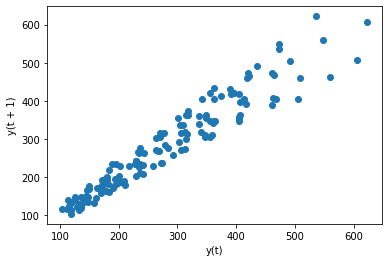

In [31]:
from pandas.plotting import lag_plot

lag_plot(df1['Thousands of Passengers']);

### Here we can see that there is a strong correlation between y(t) and y(t+1), so a big evidence of Autocorrelation

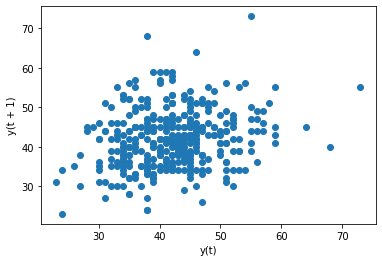

In [34]:
lag_plot(df2['Births']);

## No visual cue for autocorrelation for female birth dataset

## ACF plots

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [36]:
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

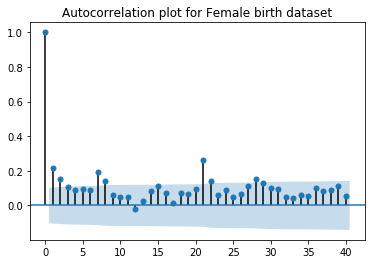

In [39]:
title='Autocorrelation plot for Female birth dataset'
lags=40
plot_acf(df2,title=title,lags=lags);

### Here we can see that the data is not having a autocorrelation, and the data is stationary

In [40]:
acf(df1['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

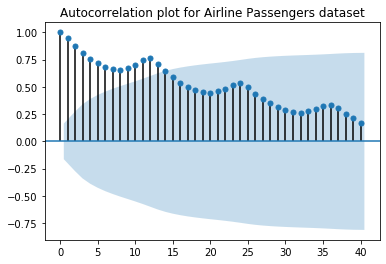

In [42]:
title='Autocorrelation plot for Airline Passengers dataset'
lags=40
plot_acf(df1,title=title,lags=lags);

### This is the ACF plot for non-stationary data

### PACF Plots

Partial autocorrelation works well with stationary data

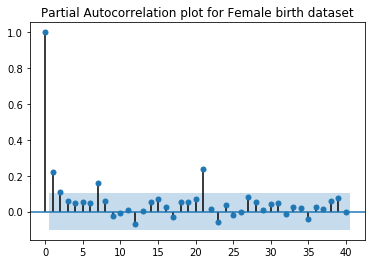

In [43]:
title='Partial Autocorrelation plot for Female birth dataset'
lags=40
plot_pacf(df2,title=title,lags=lags);

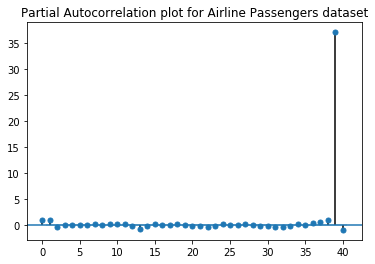

In [44]:
title='Partial Autocorrelation plot for Airline Passengers dataset'
lags=40
plot_pacf(df1,title=title,lags=lags);

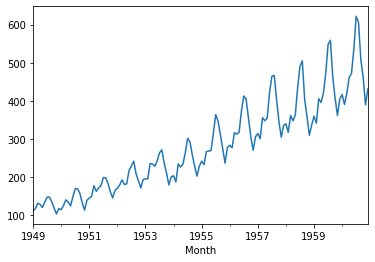

In [46]:
df1['Thousands of Passengers'].plot();

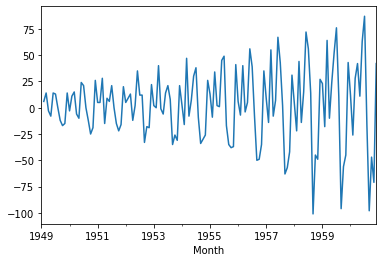

In [47]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Thousands of Passengers'],k_diff=1) # Differencing Step
df1['d1'].plot();

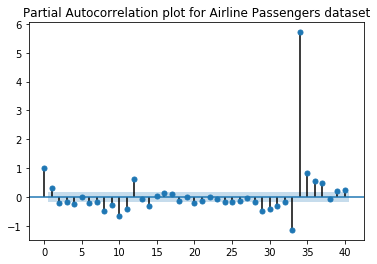

In [49]:
title='Partial Autocorrelation plot for Airline Passengers dataset'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=lags);